In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
X_full = pd.read_csv('./train.csv', index_col='Id')
X_test_full = pd.read_csv('./test.csv')

In [6]:
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == 'object']
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['float64', 'int64']]
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [13]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [18]:
numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                      ])

In [20]:
clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
print('MAE:', mean_absolute_error(preds, y_valid))

MAE: 17861.780102739725


Exercise : The same thing but with
numerical_transformer = SimpleImputer(strategy='mean') for better performance

In [42]:
train_data = pd.read_csv('./train.csv', index_col='Id')
test_data = pd.read_csv('./test.csv', index_col='Id')


train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [43]:
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']


In [26]:
X = data[cols_to_use]
y = data.Price


In [44]:
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50, random_state=0))])

In [45]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print('MAE scores:', scores)

MAE scores: [18549.88568493 17896.67034247 18462.68472603 16587.02472603
 19885.78630137]


In [46]:
print('Average MAE score')
print(scores.mean())

Average MAE score
18276.410356164386


In [48]:
train_data = pd.read_csv('./train.csv', index_col='Id')
test_data = pd.read_csv('./test.csv', index_col='Id')

train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)


numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [49]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [50]:
scores = -cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


In [51]:
print('Average MAE score:', scores.mean())

Average MAE score: 18276.410356164386


In [74]:
def get_score(n_estimators):
    Pipe = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -cross_val_score(Pipe, X, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()

In [54]:
import numpy as np

In [96]:
n_estimators_list = [i for i in np.linspace(50, 400, 8)]
n_estimators_list = [int(a) for a in n_estimators_list]
results = {}
for i in n_estimators_list:
    results[i] = get_score(i)


In [97]:
results 

{50: 18353.8393511688,
 100: 18395.2151680032,
 150: 18288.730020956387,
 200: 18248.345889801505,
 250: 18255.26922247291,
 300: 18275.241922621914,
 350: 18270.29183308043,
 400: 18270.197974402367}

In [92]:
dicti = {}
dicti[0] = 0
dicti

{0: 0}

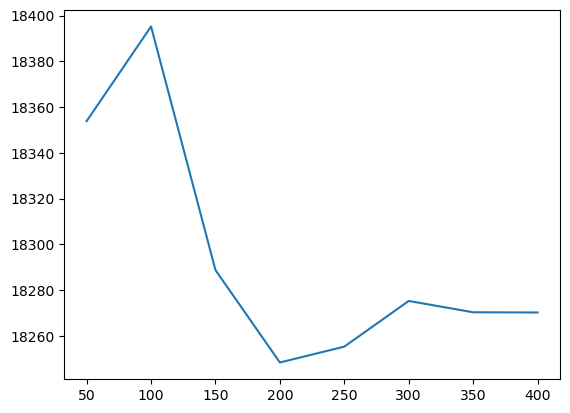

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [101]:
data = pd.read_csv('./melb_data.csv')
X = data[cols_to_use]
y = data.Price
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [102]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [103]:
predictions = my_model.predict(X_valid)
print('Mean Absolute Error', mean_absolute_error(y_valid, predictions))

Mean Absolute Error 236763.3362550626


In [106]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

/home/thomas/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)],verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)

In [108]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=6)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)
predictions = my_model.predict(X_valid)
print('Mean Absolute Error', mean_absolute_error(y_valid, predictions))

Mean Absolute Error 243197.70321704712


In [110]:
X = pd.read_csv('./train.csv', index_col='Id')
X_test_full = pd.read_csv('./test.csv', index_col='Id')


X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)


X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [118]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)


In [119]:
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [121]:
my_model_1 = XGBRegressor(random_state=0)
my_model_1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [122]:
predictions_1 = my_model_1.predict(X_valid)

In [124]:
mae_1 = mean_absolute_error(y_valid, predictions_1)
mae_1

17662.736729452055

In [148]:
my_model_2 = XGBRegressor(n_estimators = 500, random_state=0, n_jobs=6, learning_rate=0.05)

In [149]:
my_model_2.fit(X_train, y_train)
predictions_2 = my_model_2.predict(X_valid)
mae_2 = mean_absolute_error(y_valid, predictions_2)
mae_2

16728.27523009418

In [142]:
my_model_3 = XGBRegressor(n_estimators = 50, random_state=0, n_jobs=6, learning_rate=5)

In [143]:
my_model_3.fit(X_train, y_train)
predictions_3 = my_model_3.predict(X_valid)
mae_3 = mean_absolute_error(y_valid, predictions_3)
mae_3

1.7349612789044896e+35

In [150]:
data = pd.read_csv('./AER_credit_card_data.csv', true_values= ['yes'], false_values= ['no'])
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,True,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,True,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,True,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,True,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,True,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [151]:
y= data.card
X = data.drop(['card'], axis=1)


In [153]:
print("Number of rows in the dataset:", X.shape[0])
X.head()

Number of rows in the dataset: 1319


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [155]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='accuracy')
print('Cross-Validation accuracy: %f' %cv_scores.mean())

Cross-Validation accuracy: 0.979534


In [183]:
X.expenditure

0       124.983300
1         9.854167
2        15.000000
3       137.869200
4       546.503300
           ...    
1314      7.333333
1315      0.000000
1316    101.298300
1317     26.996670
1318    344.157500
Name: expenditure, Length: 1319, dtype: float64

In [189]:
expenditures_cardholders = X.expenditure[y]
expenditures_noncardholders = X.expenditure[~y]


In [192]:
print('Fraction of plp who did not receive a card and had no expenditures: %.2f' %((expenditures_noncardholders == 0).mean()))
print('Fraction of plp who  received a card and had no expenditures: %.2f' %((expenditures_cardholders == 0).mean()))


Fraction of plp who did not receive a card and had no expenditures: 1.00
Fraction of plp who  received a card and had no expenditures: 0.02


In [193]:
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']
X2 = X.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(my_pipeline, X2, y, cv=5, scoring='accuracy')
print('Cross-val accuracy %f' %(cv_scores.mean()))

Cross-val accuracy 0.832443
